In [183]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.constants import pi

colors = ['#003D5B', '#D1495B', '#EDAE49', '#00798C', '#401F3E'] 

# Simulateur 1. Diffusion sur un plan xy

Pour simuler un mouvement brownien en 2D, on cumule un mouvement brownien en x et un mouvement brownien en y.

source: https://ipython-books.github.io/133-simulating-a-brownian-motion/ 

In [184]:
class DiffusionSimulator():

    def __init__(self, t:int, dt:int, dx:int, D:float):
        """Class that simulate de diffusion of a set of particule.

        Args:
            t (int): Total time of the simulation in seconds.
            dt (int): Time increment in second.
            dx (int): Localisation precision
            D (float): Diffusion coefficient
        """
        self.TotalTime = t
        self.TimeSteps = dt
        self.LocalizationPrecision = dx
        self.DiffusionCoefficient = D


    def box_limit(self, x_2_test:float, y_2_test:float,
                  x:float=1, y:float=1e-6)->bool:
        """Method that create a box limiting the propagation of the particule. Check if the particule is out of bound. If out of bound, return False so it will create a new iteration to force the particule in the restricted zone.

        All the units in this method must be in meters.

        Args:
            x_2_test (float): New x position to test.
            y_2_test (float): New y position to test.
            x (float, optional): Full width of the rectangle. Defaults to 1.
            y (float, optional): Full height of the rectangle. Defaults to 1e-6.

        Returns:
            bool: Indicate if the position is in bound. If False, retry the movement.
        """
        if x_2_test <= -1*x/2 or x_2_test >= x/2:
            return False
        if y_2_test <= -1*y/2 or y_2_test >= y/2:
            return False
        else:
            return True


    def circle_limit(self, x_2_test:float, y_2_test:float,
                     radius:float=2e-6)->bool:
        """Method that create a circle limiting the propagation of the particule. Check if the particle is in bound. If out of bound, return False so it will indicate the need of a new iteration to force the particule in the restricted zone.

        All the units in this method must be in meters.

        Args:
            x_2_test (float): New x position to test.
            y_2_test (float): New y position to test.
            radius (float, optional): Radius of the circle. Defaults to 2e-6.

        Returns:
            bool: Indicate if the position is in bound. If False, retry the movement.
        """
        if x_2_test**2 + y_2_test**2 >= radius**2:
            return False
        else:
            return True

    # Section with limitation
    def GenerateMotion(self, limitation:str):
        """Method that generate the motion of the particules. LIMITATIONS"""

        if limitation == "rectangle":
            limitation = self.box_limit
        else:
            limitation = self.circle_limit

        x_space = np.logspace(-9,-2,1000)
        n = int(self.TotalTime/self.TimeSteps)

        concentration = 1/np.sqrt(4*pi*self.DiffusionCoefficient*self.TimeSteps)*np.exp(-x_space**2/(4*self.DiffusionCoefficient*self.TimeSteps)) 
        concentration/=np.sum(concentration)

        # r = np.random.choice(x,p=concentration,size=n)
        # angles = np.random.uniform(0,2*pi,n)
        x, y = np.zeros(n), np.zeros(n)
        old_x, old_y = 0, 0

        for i in range(n):
            
            angle = np.random.uniform(0,2*pi)
            r = np.random.choice(a=x_space,p=concentration, size=1)[0]
            new_x = old_x + r*np.cos(angle)
            new_y = old_y + r*np.sin(angle)
            # print(new_x, new_y)
            # print(limitation(new_x, new_y))
            while limitation(new_x, new_y) == False:
                angle = np.random.uniform(0,2*pi)
                r = np.random.choice(a=x_space,p=concentration, size=1)[0]
                new_x = old_x + r*np.cos(angle)
                new_y = old_y + r*np.sin(angle)
                print(new_x, new_y, "ok")

            x[i], old_x = new_x, new_x
            y[i], old_y = new_y, new_y

        # QUESTION, POURQUOI LE CUMSUM??
        # x = np.cumsum(x)
        # y = np.cumsum(y)
        self.data = (x,y)

    # OG SECTION
    # def GenerateMotion(self):
    #     """Method that generate the motion of the particules."""
        
    #     x = np.logspace(-9,-4,1000)
    #     n = int(self.TotalTime/self.TimeSteps)

    #     concentration = 1/np.sqrt(4*pi*self.DiffusionCoefficient*self.TimeSteps)*np.exp(-x**2/(4*self.DiffusionCoefficient*self.TimeSteps)) 
    #     concentration/=np.sum(concentration)

    #     r = np.random.choice(x,p=concentration,size=n)
    #     angles = np.random.uniform(0,2*pi,n)

    #     x, y = np.zeros(n), np.zeros(n)
    #     for i in range(n):
    #         x[i] = r[i]*np.cos(angles[i])
    #         y[i] = r[i]*np.sin(angles[i])
    #     x = np.cumsum(x)*1e6 #nm
    #     y = np.cumsum(y)*1e6 #nm
    #     self.data = (x,y)


    def MeanSquareDisplacement(self):
        """Method that calculate the mean square displacement.

        Returns:
            np.array: Array containing the MSD
        """
        x,y = self.data
        x0,y0 = x[0],y[0]
        MSD = np.zeros(x.shape[0])
        for i in range(x.shape[0]):
            x1, y1 = x[i], y[i]
            MSD[i] = (x1-x0)**2 + (y1-y0)**2
            x0,y0 = x1,y1

        return np.cumsum(MSD)
        
    # def MSDFit(self):
    #     def droite(x, a, b):
    #         return x*a+b
    #     t_array = np.linspace(0,self.TotalTime,int(self.TotalTime/self.TimeSteps))
    #     popt, pcov = curve_fit(droite,t_array,self.MeanSquareDisplacement())
    #     self.DiffusionCalculated = popt[0]/4
    #     return self.DiffusionCalculated

In [185]:
# ### FOR OG CODE
# Simulation = DiffusionSimulator(t=60, dt=0.01, dx=1, D=1e-9)
# Simulation.GenerateMotion()    # Change in class the method in comments
# x,y = Simulation.data
# plt.plot(x,y,color = colors[1])
# plt.title("Free 2D diffusion")
# plt.xlabel("Position [m]")
# plt.ylabel("Position [m]")
# plt.gca().ticklabel_format(style='sci', scilimits=(0, 0))
# plt.show()

-7.560940265013139e-07 -1.2115838742152632e-07 ok
-1.93674105644321e-06 -1.4651443296743205e-08 ok
-1.9615223254573696e-06 -2.7705406957768446e-07 ok
3.846491506888689e-07 -2.9346176206464536e-07 ok
3.693826471544334e-07 -2.870299504881216e-07 ok
1.4877875535859012e-06 -4.922964459813997e-07 ok
1.4505903875460534e-06 -5.311567580961388e-07 ok
1.4730876852325735e-06 -5.250907066897877e-07 ok
1.3024060573356866e-06 -1.404000848096879e-07 ok
1.30906640478297e-06 -1.542174039704689e-07 ok
-1.1680520204485496e-06 -1.0864681048495832e-08 ok
-9.77774205002655e-07 6.811817755758852e-07 ok
-3.788934803486028e-06 -5.343601093824262e-06 ok
-1.9031426103916511e-06 5.154900328799295e-07 ok
-1.4988079109090763e-06 2.83561796671052e-07 ok
3.300803302407418e-06 5.307145670513603e-07 ok
2.9517774430856192e-06 4.903432169835104e-07 ok
3.12538734281352e-06 -2.011562518943672e-06 ok
3.1004144282911043e-06 1.5476138691967747e-07 ok
3.2213396205110333e-06 5.760427140109546e-07 ok
3.0145686293146633e-06 -4.1

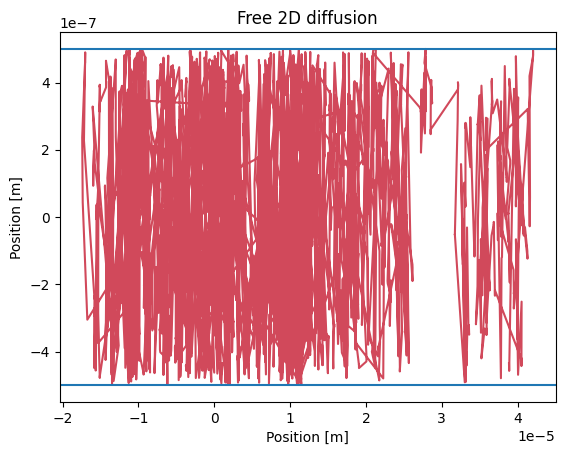

In [186]:
Simulation = DiffusionSimulator(t=60, dt=0.01, dx=1, D=1e-9)
# Simulation.GenerateMotion()   # Uncomment for og
Simulation.GenerateMotion(limitation="rectangle") # uncomment this for limits
x,y = Simulation.data
plt.plot(x,y,color = colors[1])
plt.title("Free 2D diffusion")
plt.xlabel("Position [m]")
plt.ylabel("Position [m]")
plt.axhline(0.5e-6)
plt.axhline(-0.5e-6)
plt.gca().ticklabel_format(style='sci', scilimits=(0, 0))
plt.show()

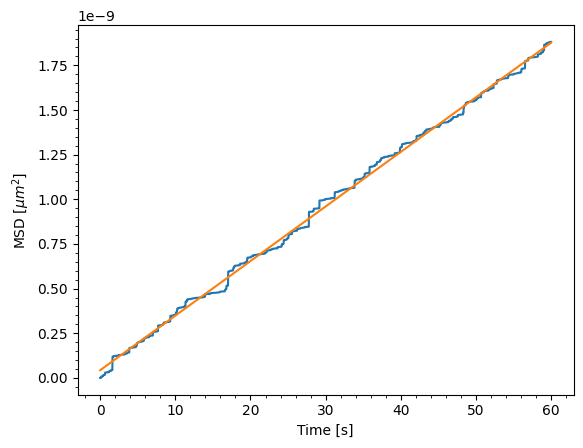

Le coefficient de diffusion est de (7.638955272802883e-12 ± 1.8887222439107366e-29).


In [187]:

time_array = np.linspace(0,Simulation.TotalTime,
                         int(Simulation.TotalTime/Simulation.TimeSteps))
MSD = Simulation.MeanSquareDisplacement()

def droite(x, a, b):
    return a*x*4 + b
popt, pcov = curve_fit(droite, time_array, MSD)

plt.plot(time_array, MSD)
plt.plot(time_array, droite(time_array, *popt))
plt.xlabel("Time [s]")
plt.ylabel(r"MSD [$\mu m^2$]")
plt.minorticks_on()
plt.show()

print(f"Le coefficient de diffusion est de ({popt[0]} ± {np.diag(pcov)[0]}).")

## Impact du temps de simulation sur $D$
Afin de déterminer l'impact du temps de simulation sur la mesure estimée du coefficient de diffusion, le ```curve_fit``` sera effectué à chaque seconde afin de voir la convergence de la mesure.

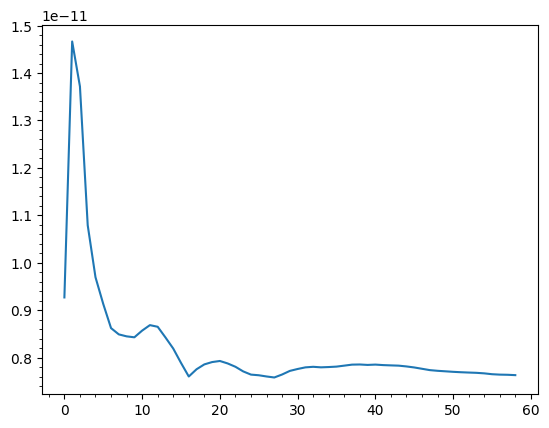

In [188]:
time_array = np.linspace(0,Simulation.TotalTime,
                         int(Simulation.TotalTime/Simulation.TimeSteps))

MSD = Simulation.MeanSquareDisplacement()


msd_values = np.zeros(Simulation.TotalTime - 1)
def droite(x, a, b):
    return a*x *4 + b


for i in enumerate(range(int(1/Simulation.TimeSteps),
               int(Simulation.TotalTime/Simulation.TimeSteps),
               int(1/Simulation.TimeSteps))):
    popt, pcov = curve_fit(droite, time_array[0:i[1]], MSD[0:i[1]])
    msd_values[i[0]] = popt[0]

plt.plot(msd_values)
plt.minorticks_on()
plt.show()

# not comprendo ce qui a en bas

In [189]:
MSDfit = Simulation.MSDFit()

AttributeError: 'DiffusionSimulator' object has no attribute 'MSDFit'

In [ ]:
Simulation.DiffusionCalculated

In [ ]:
def droite(x, a, b):
    return x*a + b
popt, pcov = curve_fit(droite,time_array,MSD)
DiffusionCalculated = popt[0]/4
print(popt[1])

In [ ]:
DiffusionCalculated

In [ ]:

plt.plot(time_array,MSD)
plt.plot(time_array, popt[0]*time_array+popt[1])
plt.show()

In [ ]:
x = np.logspace(-9,-4,1000)
concentration = 1 / np.sqrt(4*pi*D*dt)*np.exp(-x**2/(4*D*dt)) 
concentration/=np.sum(concentration)


x = np.random.choice(x,p=concentration,size=1000)
angles = np.random.uniform(0,2*pi,1000)